In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
r = readers.CollectionReader('../src/beta_kl_debug/agents')

100%|██████████| 6/6 [00:00<00:00,  7.79it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [4]:
games =  ["Humanoid-v2"]
code_level_opts = {
      #"kl_penalty_coeff": [0.1, 1, 3, 10],
      "kl_penalty_direction": ["new_to_old", "old_to_new"],
      #'clip_advantages': [1e8],
      #'norm_rewards': ['none', 'returns'],
      #'anneal_lr': [False, True],
      #'value_clipping': [False, True],
      #'initialization': ['xavier', 'orthogonal']
}

NUM_BINS = 20

In [5]:
#metadata['kl_penalty'] = (metadata['kl_penalty_coeff'] > 0)
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
#constraints = constraints.merge(key_metadata, on='exp_id')
#constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

# Plot mean rewards

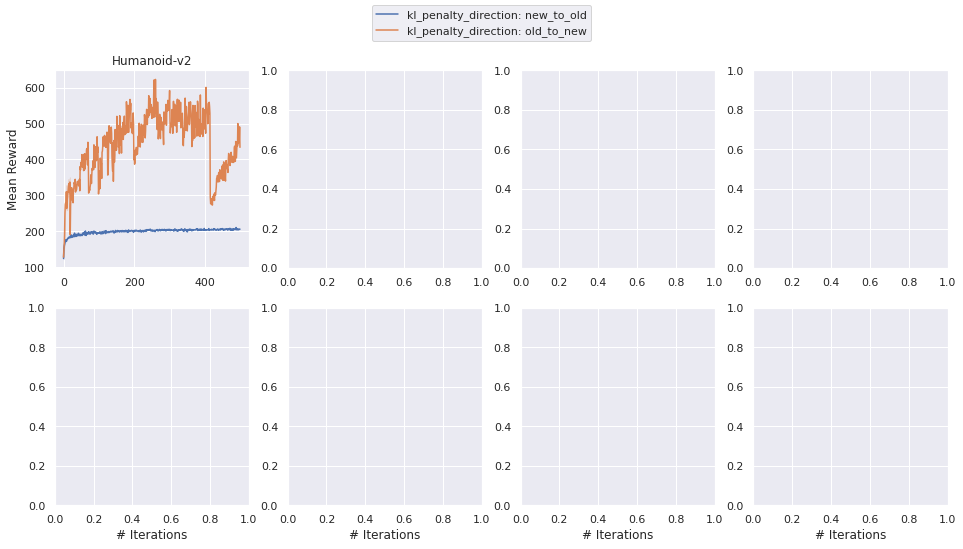

In [6]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for i, cl_opt in enumerate(code_level_opts):
        for b in code_level_opts[cl_opt]:
            filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
            sns.lineplot(filt.opt_step, filt.mean_reward,
                         ax=ax.flatten()[j], label=f"{cl_opt}: {b}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()

In [11]:
constraints[constraints['exp_id'] == '7bcf8a74-2663-4f2e-a77c-76c453df736d']

,avg_kl_old_to_new,avg_kl_new_to_old,max_ratio,opt_step,exp_id
0,-19.803284,-353.363831,236.446747,0,7bcf8a74-2663-4f2e-a77c-76c453df736d
1,-3284.616699,-3588.164062,8.307866,10,7bcf8a74-2663-4f2e-a77c-76c453df736d
2,-6246.222168,-6541.287598,1.380504,20,7bcf8a74-2663-4f2e-a77c-76c453df736d
3,-9193.370117,-9487.944336,1.227321,30,7bcf8a74-2663-4f2e-a77c-76c453df736d
4,-12138.713867,-12433.195312,1.170832,40,7bcf8a74-2663-4f2e-a77c-76c453df736d
5,-15082.934570,-15377.330078,1.130109,50,7bcf8a74-2663-4f2e-a77c-76c453df736d
6,-18026.513672,-18320.824219,1.105549,60,7bcf8a74-2663-4f2e-a77c-76c453df736d
7,-20969.599609,-21263.880859,1.090270,70,7bcf8a74-2663-4f2e-a77c-76c453df736d
8,-23912.363281,-24206.626953,1.080730,80,7bcf8a74-2663-4f2e-a77c-76c453df736d
9,-26857.070312,-27151.630859,1.070227,90,7bcf8a74-2663-4f2e-a77c-76c453df736d


In [12]:
constraints['exp_id']

0     7bcf8a74-2663-4f2e-a77c-76c453df736d
1     7bcf8a74-2663-4f2e-a77c-76c453df736d
2     7bcf8a74-2663-4f2e-a77c-76c453df736d
3     7bcf8a74-2663-4f2e-a77c-76c453df736d
4     7bcf8a74-2663-4f2e-a77c-76c453df736d
                      ...                 
48    7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
49    7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
0     56289243-7eeb-4c6c-a706-f166f97664ff
1     56289243-7eeb-4c6c-a706-f166f97664ff
0     ffb89a1c-2682-4952-9949-1f7d112a09e5
Name: exp_id, Length: 103, dtype: object

In [13]:
constraints[constraints['exp_id'] == '7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5']

,avg_kl_old_to_new,avg_kl_new_to_old,max_ratio,opt_step,exp_id
0,-43.072231,-43.243904,1.178186e+02,0,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
1,-52.248047,-52.944542,1.822843e+01,10,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
2,-55.519665,-56.200687,6.106055e+01,20,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
3,-60.331764,-60.563969,2.288450e+01,30,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
4,-58.472031,-58.918259,3.904575e+01,40,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
5,-59.765942,-59.316654,5.852144e+01,50,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
6,-58.277817,-57.583633,2.329329e+02,60,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
7,-56.470028,-68.874969,3.599757e+07,70,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
8,-69.204857,-68.855034,6.359578e+00,80,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
9,-68.480370,-68.202553,2.583242e+02,90,7ec44575-2c70-4d8e-9d2e-1f0cbea30bc5
